In [8]:
from collections import deque
import matplotlib.pyplot as plt
import heapq
import time

In [9]:
def get_successors(state):
    blank = state.index(0)
    row = blank // 3
    col = blank % 3
    successors = []
    if row > 0:
        new_blank = blank - 3
        new_state = list(state)
        new_state[blank], new_state[new_blank] = new_state[new_blank], new_state[blank]
        successors.append((tuple(new_state), 'up'))
    if row < 2:
        new_blank = blank + 3
        new_state = list(state)
        new_state[blank], new_state[new_blank] = new_state[new_blank], new_state[blank]
        successors.append((tuple(new_state), 'down'))
    if col > 0:
        new_blank = blank - 1
        new_state = list(state)
        new_state[blank], new_state[new_blank] = new_state[new_blank], new_state[blank]
        successors.append((tuple(new_state), 'left'))
    if col < 2:
        new_blank = blank + 1
        new_state = list(state)
        new_state[blank], new_state[new_blank] = new_state[new_blank], new_state[blank]
        successors.append((tuple(new_state), 'right'))
    return successors

In [10]:
def bfs_search(start, goal):
    start_time = time.time()
    queue = deque([start])
    visited = {start: (None, None)}
    nodes_visited = 0
    max_queue_size = 1
    while queue:
        current_queue_size = len(queue)
        if current_queue_size > max_queue_size:
            max_queue_size = current_queue_size
        current_state = queue.popleft()
        nodes_visited += 1
        if current_state == goal:
            path = []
            state = current_state
            while True:
                parent, action = visited[state]
                if parent is None:
                    break
                path.append(action)
                state = parent
            path.reverse()
            end_time = time.time()
            return {
                'path': path,
                'nodes_visited': nodes_visited,
                'path_cost': len(path),
                'time': end_time - start_time,
                'max_memory': len(visited)
            }
        for next_state, action in get_successors(current_state):
            if next_state not in visited:
                visited[next_state] = (current_state, action)
                queue.append(next_state)
    return None

In [11]:
def dfs_search(start, goal):
    start_time = time.time()
    stack = [start]
    visited = {start: (None, None)}
    nodes_visited = 0
    max_stack_size = 1
    while stack:
        current_stack_size = len(stack)
        if current_stack_size > max_stack_size:
            max_stack_size = current_stack_size
        current_state = stack.pop()
        nodes_visited += 1
        if current_state == goal:
            path = []
            state = current_state
            while True:
                parent, action = visited[state]
                if parent is None:
                    break
                path.append(action)
                state = parent
            path.reverse()
            end_time = time.time()
            return {
                'path': path,
                'nodes_visited': nodes_visited,
                'path_cost': len(path),
                'time': end_time - start_time,
                'max_memory': len(visited)
            }
        successors = get_successors(current_state)
        for next_state, action in reversed(successors):
            if next_state not in visited:
                visited[next_state] = (current_state, action)
                stack.append(next_state)
    return None

In [12]:
def ids_search(start, goal):
    start_time = time.time()
    depth = 0
    total_nodes_visited = 0
    max_memory = 0
    while True:
        result = dls(start, goal, depth)
        total_nodes_visited += result['nodes_visited']
        current_memory = result['max_stack_size'] + result['visited_size']
        if current_memory > max_memory:
            max_memory = current_memory
        if result['path'] is not None:
            end_time = time.time()
            return {
                'path': result['path'],
                'nodes_visited': total_nodes_visited,
                'path_cost': len(result['path']),
                'time': end_time - start_time,
                'max_memory': max_memory
            }
        depth += 1

In [13]:
def dls(start, goal, limit):
    stack = [(start, 0, [])]
    visited = {}
    nodes_visited = 0
    max_stack_size = 1
    while stack:
        current_stack_size = len(stack)
        if current_stack_size > max_stack_size:
            max_stack_size = current_stack_size
        current_state, current_depth, path = stack.pop()
        nodes_visited += 1
        if current_state == goal:
            return {
                'path': path,
                'nodes_visited': nodes_visited,
                'max_stack_size': max_stack_size,
                'visited_size': len(visited)
            }
        if current_state in visited:
            if visited[current_state] <= current_depth:
                continue
        visited[current_state] = current_depth
        if current_depth < limit:
            successors = get_successors(current_state)
            for next_state, action in reversed(successors):
                new_depth = current_depth + 1
                new_path = path + [action]
                if next_state not in visited or new_depth < visited.get(next_state, float('inf')):
                    stack.append((next_state, new_depth, new_path))
    return {
        'path': None,
        'nodes_visited': nodes_visited,
        'max_stack_size': max_stack_size,
        'visited_size': len(visited)
    }

In [14]:
def ucs_search(start, goal):
    start_time = time.time()
    heap = []
    heapq.heappush(heap, (0, start, []))
    visited = set()
    nodes_visited = 0
    max_heap_size = 1
    while heap:
        current_heap_size = len(heap)
        if current_heap_size > max_heap_size:
            max_heap_size = current_heap_size
        cost, current_state, path = heapq.heappop(heap)
        if current_state in visited:
            continue
        visited.add(current_state)
        nodes_visited += 1
        if current_state == goal:
            end_time = time.time()
            return {
                'path': path,
                'nodes_visited': nodes_visited,
                'path_cost': len(path),
                'time': end_time - start_time,
                'max_memory': len(visited) + max_heap_size
            }
        for next_state, action in get_successors(current_state):
            if next_state not in visited:
                new_cost = cost + 1
                new_path = path + [action]
                heapq.heappush(heap, (new_cost, next_state, new_path))
    return None

In [15]:
start_input = input("Enter start State: ")
goal_input = input("Enter goal State: ")
start = tuple(map(int, start_input))
goal = tuple(map(int, goal_input))

Enter start State: 120345678
Enter goal State: 012345678


In [16]:
algorithms = {
    'BFS': bfs_search,
    'DFS': dfs_search,
    'IDS': ids_search,
    'UCS': ucs_search
}

In [17]:
results = {}
for algo_name in algorithms:
    algo_func = algorithms[algo_name]
    result = algo_func(start, goal)
    results[algo_name] = result

In [18]:
for algo_name in results:
    result = results[algo_name]
    print(f"\n{algo_name}:")
    if result:
       print("Steps to solve:", result['path'])
       print("Number of steps (Path Cost):", result['path_cost'])
       print("Nodes visited:", result['nodes_visited'])
       print("Time taken: {:.6f} seconds".format(result['time']))
       print("Max memory used:", result['max_memory'])
    else:
       print("No solution found.")


BFS:
Steps to solve: ['left', 'left']
Number of steps (Path Cost): 2
Nodes visited: 7
Time taken: 0.000070 seconds
Max memory used: 14

DFS:
Steps to solve: ['down', 'down', 'left', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'right', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'right', 'down', 'down', 'left', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'right', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'right', 'down', 'down', 'left', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'up', 'left', 'down', 'down',


Comparison Table:
Algorithm  Nodes Visited   Path Cost       Memory          Time (s)       


In [21]:
print("\nComparison Table:")
print("{:<10} {:<15} {:<15} {:<15} {:<15}".format(
   "Algorithm", "Nodes Visited", "Path Cost", "Memory", "Time (s)"))
for algo_name in ['BFS', 'DFS', 'IDS', 'UCS']:
    result = results[algo_name]
    if result:
        print("{:<10} {:<15} {:<15} {:<15} {:<15.6f}".format(
            algo_name,
            result['nodes_visited'],
            result['path_cost'],
            result['max_memory'],
            result['time']))
    else:
        print("{:<10} {:<15} {:<15} {:<15} {:<15}".format(
            algo_name, "N/A", "N/A", "N/A", "N/A"))


Comparison Table:
Algorithm  Nodes Visited   Path Cost       Memory          Time (s)       
BFS        7               2               14              0.000070       
DFS        181204          294             181440          0.721574       
IDS        11              2               9               0.000360       
UCS        4               2               8               0.000036       


In [22]:
algorithms_list = ['BFS', 'DFS', 'IDS', 'UCS']
nodes_visited = [results[algo]['nodes_visited'] if results[algo] else 0 for algo in algorithms_list]
path_costs = [results[algo]['path_cost'] if results[algo] else 0 for algo in algorithms_list]
times = [results[algo]['time'] if results[algo] else 0 for algo in algorithms_list]
memory = [results[algo]['max_memory'] if results[algo] else 0 for algo in algorithms_list]

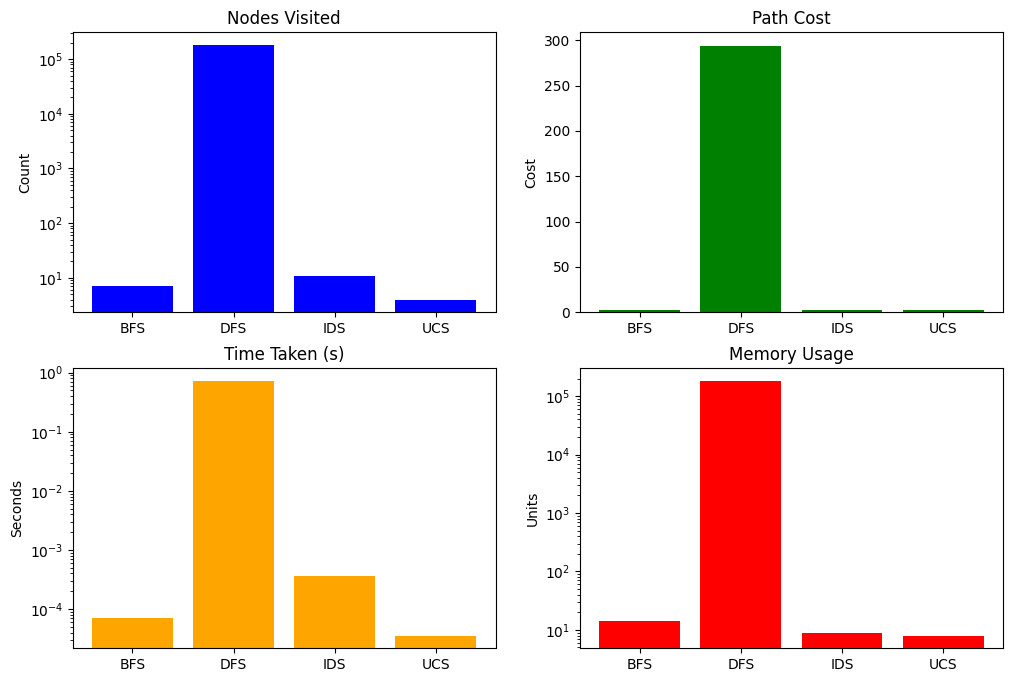

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(algorithms_list, nodes_visited, color='blue')
plt.title('Nodes Visited')
plt.ylabel('Count')
plt.yscale('log')

plt.subplot(2, 2, 2)
plt.bar(algorithms_list, path_costs, color='green')
plt.title('Path Cost')
plt.ylabel('Cost')

plt.subplot(2, 2, 3)
plt.bar(algorithms_list, times, color='orange')
plt.title('Time Taken (s)')
plt.ylabel('Seconds')
plt.yscale('log')

plt.subplot(2, 2, 4)
plt.bar(algorithms_list, memory, color='red')
plt.title('Memory Usage')
plt.ylabel('Units')
plt.yscale('log')